### Simple Notebook Visualizing the COVID-19 Situation in Switzerland by Canton

This notebook uses the data compiled by https://github.com/openZH and through pandas and matplotlib, slices and visualizes the data.

In [18]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [29]:
cantons = {
    "AG": "Aargau",
    "AI": "Appenzell Innerrhoden",
    "AR": "Appenzell Ausserrhoden",
    "BE": "Bern",
    "BL": "Basel-Landschaft",
    "BS": "Basel-Stadt",
    "FR": "Fribourg",
    "GE": "Geneva",
    "GL": "Glarus",
    "GR": "Graubünden",
    "JU": "Jura",
    "LU": "Luzern",
    "NE": "Neuchâtel",
    "NW": "Nidwalden",
    "OW": "Obwalden",
    "SG": "St. Gallen",
    "SH": "Schaffhausen",
    "SO": "Solothurn",
    "SZ": "Schwyz",
    "TG": "Thurgau",
    "TI": "Ticino",
    "UR": "Uri",
    "VD": "Vaud",
    "VS": "Valais",
    "ZG": "Zug",
    "ZH": "Zürich"
}

In [19]:
latest = pd.read_csv('https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv')

In [20]:
latest.fillna(0, inplace=True)


In [21]:
df = pd.pivot_table(latest, values='ncumul_conf', index=['date'],
                    columns=['abbreviation_canton_and_fl'], aggfunc=np.sum)

In [22]:
df_clean = df.fillna(method='bfill').replace(to_replace=0, method='ffill')

In [23]:
df_clean

abbreviation_canton_and_fl,AG,AI,AR,BE,BL,BS,FL,FR,GE,GL,GR,JU,LU,NE,NW,OW,SG,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-24,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
2020-01-25,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
2020-01-26,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
2020-01-27,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
2020-01-28,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-23,1947.0,25.0,130.0,2397.0,1008.0,1183.0,99.0,1550.0,6725.0,161.0,979.0,265.0,1013.0,847.0,131.0,101.0,1217.0,161.0,651.0,460.0,558.0,3512.0,132.0,6687.0,2304.0,323.0,5548.0
2020-08-24,1956.0,25.0,130.0,2409.0,1009.0,1185.0,100.0,1561.0,6751.0,161.0,982.0,266.0,1013.0,850.0,131.0,101.0,1218.0,161.0,651.0,464.0,559.0,3512.0,132.0,6754.0,2318.0,334.0,5580.0
2020-08-25,1985.0,25.0,131.0,2420.0,1014.0,1185.0,102.0,1572.0,6787.0,162.0,986.0,266.0,1017.0,851.0,132.0,102.0,1232.0,162.0,652.0,474.0,563.0,3519.0,134.0,6819.0,2331.0,338.0,5630.0


In [24]:
sorted_keys = df_clean.max().sort_values(ascending=False).keys()

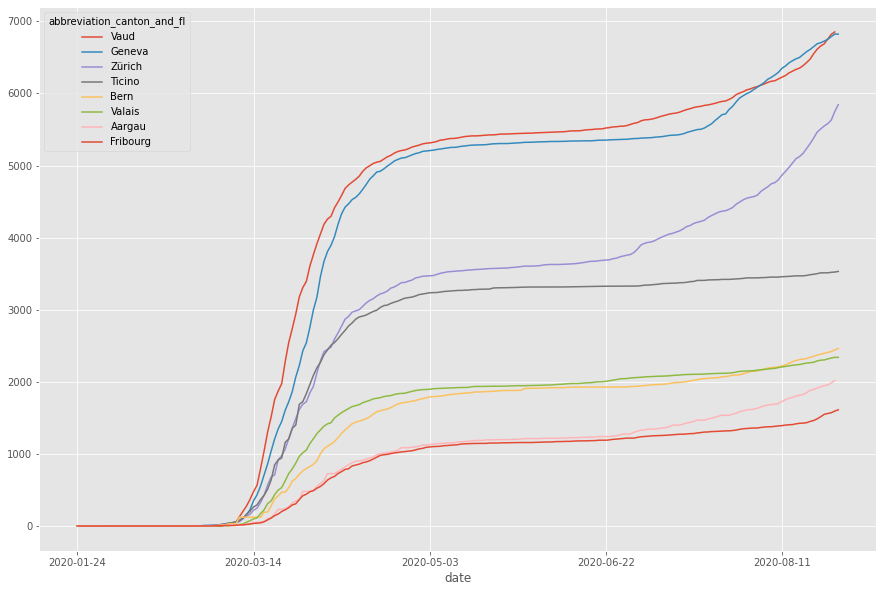

In [30]:
df_clean[sorted_keys[0:8]].rename(columns=cantons).plot(figsize=(15,10), grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e0fac4940>,
      dtype=object)

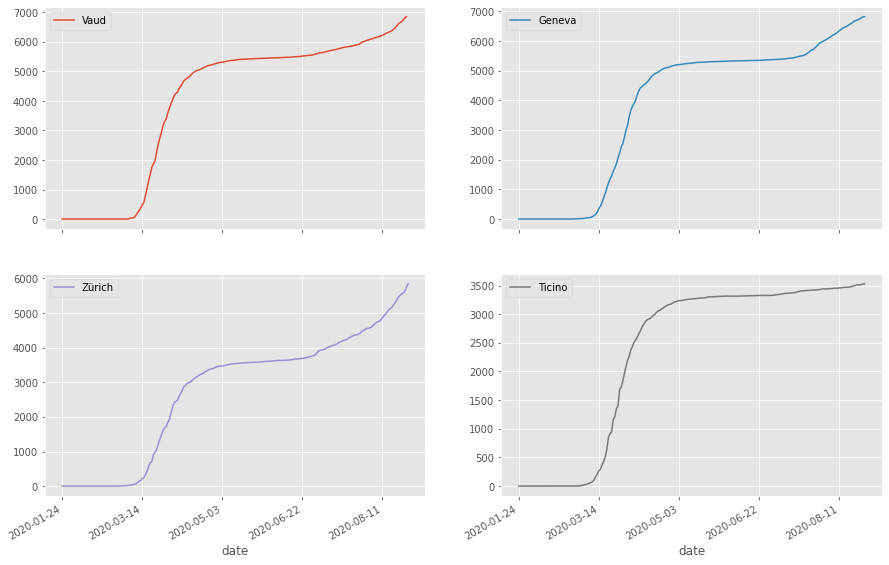

In [31]:
df_clean[sorted_keys[0:4]].rename(columns=cantons).plot(figsize=(15,10), grid=True, subplots=True, layout=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e0fbe1f98>,
      dtype=object)

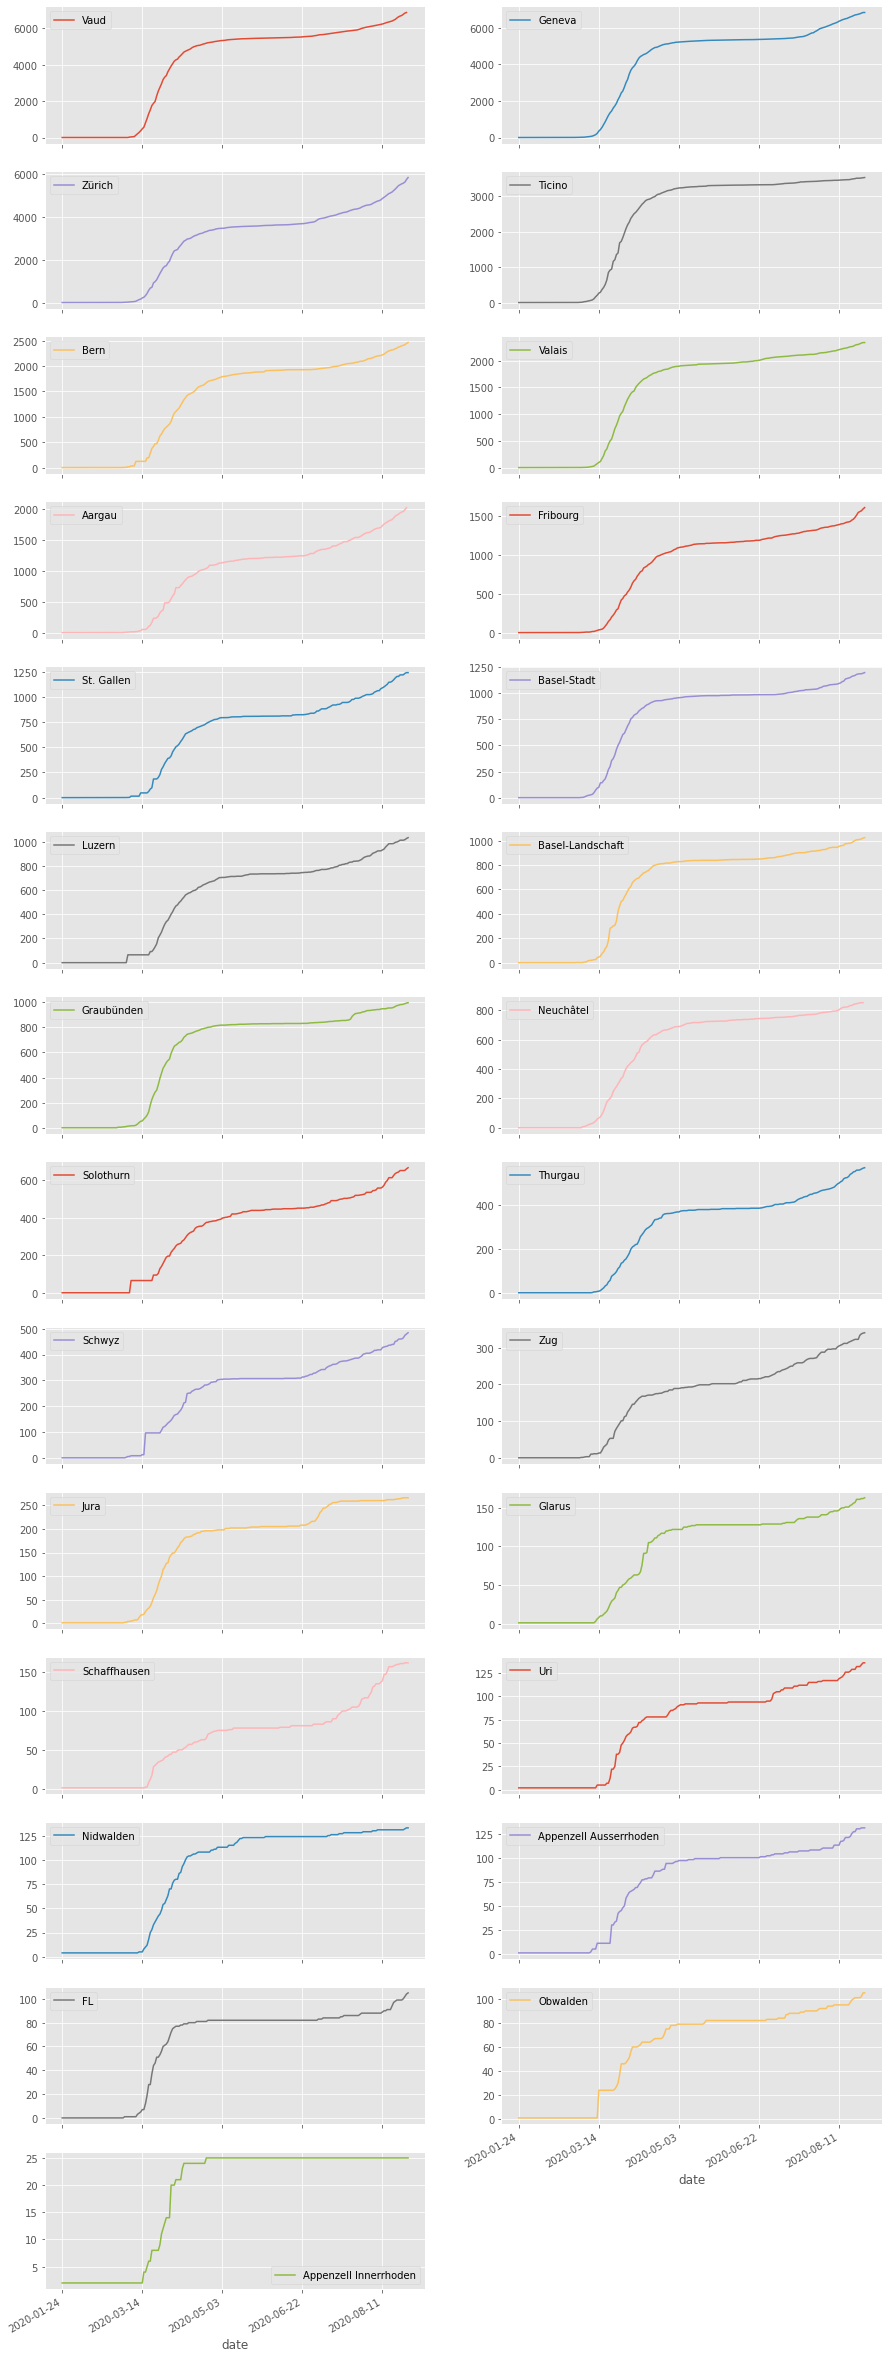

In [32]:
df_clean[sorted_keys].rename(columns=cantons).plot(figsize=(15,50), grid=True, subplots=True, layout=(15,2))